In [1]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torch
from torch import  nn
from torchvision import transforms ,datasets
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.optim.lr_scheduler as lr_scheduler

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
TrainData=datasets.CIFAR10(root="/home/yash/CNN_Data",train=True,transform=transforms.ToTensor(),download=True)
TestData=datasets.CIFAR10(root="/home/yash/CNN_Data",train=False,transform=transforms.ToTensor(),download=True)
TrainDataSet=DataLoader(TrainData,batch_size=64)
TestDataSet=DataLoader(TestData,int(len(TestData)))

Files already downloaded and verified
Files already downloaded and verified


In [3]:
class Autoencoders(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder=nn.Sequential(
            nn.Conv2d(3,16,3),
            nn.ReLU(),
            nn.Conv2d(16,32,3),
            nn.ReLU(),
            nn.Conv2d(32,16,4),
            nn.ReLU(),
            nn.Conv2d(16,1,7)
        )

        self.Decoder=nn.Sequential(
            nn.ConvTranspose2d(1,16,7),
            nn.ReLU(),
            nn.ConvTranspose2d(16,32,4),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,3),
            nn.Sigmoid()
        )


    def forward(self,Dataset):
        encode=self.encoder(Dataset)
        decode=self.Decoder(encode)
        return(decode)

In [4]:
model=Autoencoders().to(device)
LossFunc=nn.MSELoss()
Optm=Adam(params=model.parameters(),lr=1e-3)

In [5]:
epochs=20
outputs=[]

for epoch in range(epochs):
    for (image,_) in TrainDataSet:
        image=image.to(device)

        genimg=model(image)
        loss=LossFunc(genimg,image)

        Optm.zero_grad()
        loss.backward()
        Optm.step()

    print(f"Epochs:{epoch+1},Loss:{loss.item():4f}")
    outputs.append((epoch,image,genimg))
        
    

/home/yash/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epochs:1,Loss:0.020504
Epochs:2,Loss:0.018174
Epochs:3,Loss:0.017165
Epochs:4,Loss:0.016806
Epochs:5,Loss:0.016645
Epochs:6,Loss:0.016165
Epochs:7,Loss:0.016083
Epochs:8,Loss:0.015963
Epochs:9,Loss:0.015815
Epochs:10,Loss:0.015673
Epochs:11,Loss:0.015779
Epochs:12,Loss:0.015441
Epochs:13,Loss:0.015538
Epochs:14,Loss:0.015431
Epochs:15,Loss:0.015328
Epochs:16,Loss:0.015402
Epochs:17,Loss:0.015333
Epochs:18,Loss:0.015273
Epochs:19,Loss:0.015191
Epochs:20,Loss:0.015101


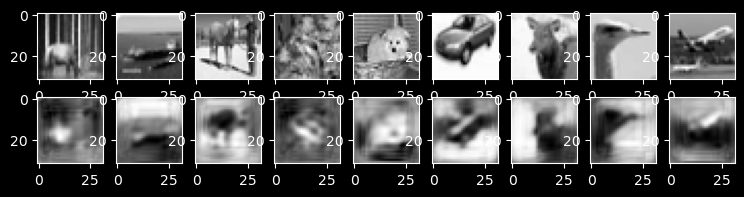

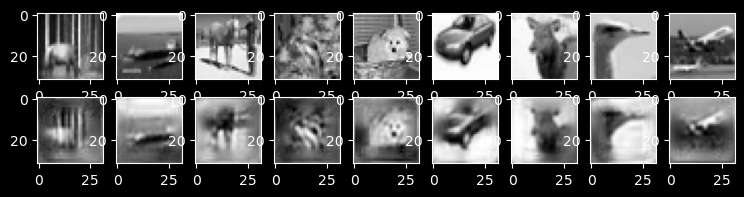

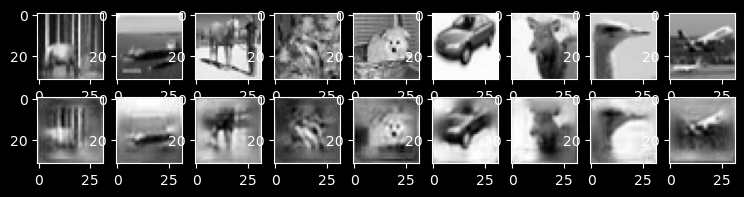

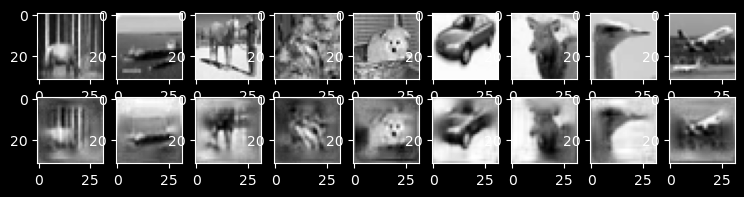

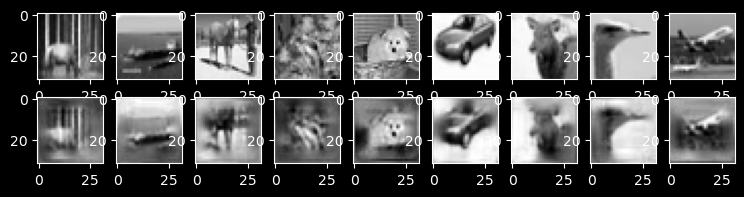

In [6]:


for k in range(0, epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = (outputs[k][1].to("cpu")).detach().numpy()
    recon = (outputs[k][2].to("cpu")).detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

